In [1]:
import helper
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Polygon
from matplotlib import animation

/gpfs1/home/c/p/cpetak/CA_GRN2/helper.py:163: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = windows.dot(grn)
/gpfs1/home/c/p/cpetak/CA_GRN2/helper.py:184: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = gene_vals.dot(internal_grn)


In [ ]:
rules = [22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102]

best_gens = []
for rule in rules:
    pop_size = 20
    grn_size=22
    dev_steps = 22
    num_cells = 22
    geneid=1
    try_seedints = [69904,149796]

    all_targs=[]
    for s in try_seedints:
        random_grns=np.random.randn(5, grn_size+2, grn_size).astype(np.float64)
        #targets, phenos, fitnesses = helper.get_pop_TPF(random_grns, len(random_grns), num_cells, grn_size, dev_steps, geneid, r, s)
        start_pattern = helper.seedID2string(s, num_cells)
        start_expression = helper.seed2expression(start_pattern, pop_size, num_cells, grn_size, geneid)
        targets = helper.rule2targets_wrapped_wstart(int(rule), L=dev_steps+1, N=num_cells, start_pattern=start_pattern)
        all_targs.append(targets)

    pop = np.random.randn(pop_size, grn_size+2, grn_size).astype(np.float64)
    target1, _, fitnesses1 = helper.get_pop_TPF(pop, len(pop), num_cells, grn_size, dev_steps, geneid, rule, try_seedints[0], try_seedints[0])
    target2, _, fitnesses2 = helper.get_pop_TPF(pop, len(pop), num_cells, grn_size, dev_steps, geneid, rule, try_seedints[1], try_seedints[1])

    landmarks=helper.make_restricted_plot(all_targs, num_cells, dev_steps, fitnesses1, fitnesses2, labelled=False)
    best_gens.append(landmarks.iloc[2][0])
    #fits[0].reshape()
    #RULE = 54

    '''
    root="~/scratch/detailed_save/"
    num_repeats=15
    pop_size = 1000
    fits=[np.loadtxt(os.path.expanduser(root+f"variable/stats_300_{rule}-{rule}_69904-149796_{i+1}_both_fits.txt")) for i in range(num_repeats)]
    fits = np.array(fits)
    num_gens = int(fits.shape[1]/2/pop_size)
    fits = fits.reshape(num_repeats, num_gens, 2, pop_size)

    fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7),sharex=True, sharey=True)
    axes = axes.flatten()

    for r in range(15):
        f1 = fits[r][::100,0,::10]#every 100th generation, every 10th individual
        f2 = fits[r][::100,1,::10]
        axes[r].scatter(f1.flatten(), f2.flatten(),s=3)
        myhatch='..'
        mycolor="C0"
        triangle = Polygon([[1,1], landmarks.iloc[0], landmarks.iloc[1]], closed=True, alpha=0.5,edgecolor=mycolor, facecolor='none',hatch=myhatch)
        axes[r].add_patch(triangle)
        triangle = Polygon([[0,0], landmarks.iloc[5], landmarks.iloc[6]], closed=True, alpha=0.5,edgecolor=mycolor, facecolor='none',hatch=myhatch)
        axes[r].add_patch(triangle)
        triangle = Polygon([[0,1], landmarks.iloc[1], landmarks.iloc[5]], closed=True, alpha=0.5,edgecolor=mycolor, facecolor='none',hatch=myhatch)
        axes[r].add_patch(triangle)
        triangle = Polygon([[1,0], landmarks.iloc[0], landmarks.iloc[6]], closed=True, alpha=0.5,edgecolor=mycolor, facecolor='none',hatch=myhatch)
        axes[r].add_patch(triangle)

        axes[r].axhline(y=0.8, color='red')

        axes[r].plot([0, 1], [0, 1], '--', linewidth = 1, color="gray")
    fig.suptitle(f"{rule}")
    plt.show()
'''


In [32]:
best_gens

[0.8181818181818181,
 0.7371541501976284,
 0.7707509881422925,
 0.8379446640316206,
 0.7529644268774703,
 0.7114624505928854,
 0.7529644268774703,
 0.7509881422924901,
 0.7440711462450593,
 0.7529644268774703,
 0.7154150197628458,
 0.7351778656126482,
 0.7707509881422925,
 0.7450592885375493,
 0.7529644268774703]

In [40]:
maxs1 = [0.8629054196198538, 0.7458108206479842, 0.8588209402827534, 0.8653687246128647, 1.0, 0.9838693971295679, 0.9926859047837574, 0.9893961674112448, 0.7249555156312295, 1.0, 0.9726457535432842, 0.899249693804146, 0.8689844094758229, 0.7768998846214848, 0.8757776187680605]
maxs2 = [0.8419417070927072, 0.7132473393348688, 0.9903762915173657, 0.8934772282770693, 0.7331140132680428, 0.9970616811236872, 0.8159153898599029, 0.7120286610623949, 0.7279448462160018, 0.9999999999999998, 0.8618669243827536, 0.8416067586683113, 0.738241371359846, 0.7205135024001457, 0.8172591238446502]


for i in range(15):
    print(rules[i])
    print(best_gens[i],maxs1[i],maxs2[i])
    if best_gens[i] > maxs1[i]:
        print("generalist better than 1")
    if best_gens[i] > maxs2[i]:
        print("generalist better than 2")
    else:
        print("generalist worse than both")



22
0.8181818181818181 0.8629054196198538 0.8419417070927072
generalist worse than both
126
0.7371541501976284 0.7458108206479842 0.7132473393348688
generalist better than 2
154
0.7707509881422925 0.8588209402827534 0.9903762915173657
generalist worse than both
18
0.8379446640316206 0.8653687246128647 0.8934772282770693
generalist worse than both
122
0.7529644268774703 1.0 0.7331140132680428
generalist better than 2
70
0.7114624505928854 0.9838693971295679 0.9970616811236872
generalist worse than both
54
0.7529644268774703 0.9926859047837574 0.8159153898599029
generalist worse than both
94
0.7509881422924901 0.9893961674112448 0.7120286610623949
generalist better than 2
30
0.7440711462450593 0.7249555156312295 0.7279448462160018
generalist better than 1
generalist better than 2
50
0.7529644268774703 1.0 0.9999999999999998
generalist worse than both
62
0.7154150197628458 0.9726457535432842 0.8618669243827536
generalist worse than both
110
0.7351778656126482 0.899249693804146 0.8416067586

In [14]:
#22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102
#18, 122, 70,54,94,50,62,110,150,102
RULE = 54

In [15]:
pop_size = 20
grn_size=22
dev_steps = 22
num_cells = 22
geneid=1
try_seedints = [69904,149796]

all_targs=[]
for s in try_seedints:
    random_grns=np.random.randn(5, grn_size+2, grn_size).astype(np.float64)
    #targets, phenos, fitnesses = helper.get_pop_TPF(random_grns, len(random_grns), num_cells, grn_size, dev_steps, geneid, r, s)
    start_pattern = helper.seedID2string(s, num_cells)
    start_expression = helper.seed2expression(start_pattern, pop_size, num_cells, grn_size, geneid)
    targets = helper.rule2targets_wrapped_wstart(int(RULE), L=dev_steps+1, N=num_cells, start_pattern=start_pattern)
    all_targs.append(targets)

pop = np.random.randn(pop_size, grn_size+2, grn_size).astype(np.float64)
target1, _, fitnesses1 = helper.get_pop_TPF(pop, len(pop), num_cells, grn_size, dev_steps, geneid, RULE, try_seedints[0], try_seedints[0])
target2, _, fitnesses2 = helper.get_pop_TPF(pop, len(pop), num_cells, grn_size, dev_steps, geneid, RULE, try_seedints[1], try_seedints[1])


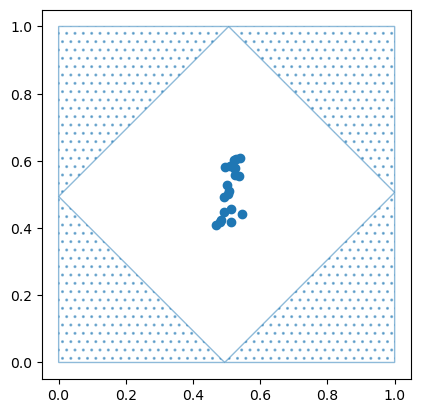

In [16]:
landmarks=helper.make_restricted_plot(all_targs, num_cells, dev_steps, fitnesses1, fitnesses2, labelled=False)

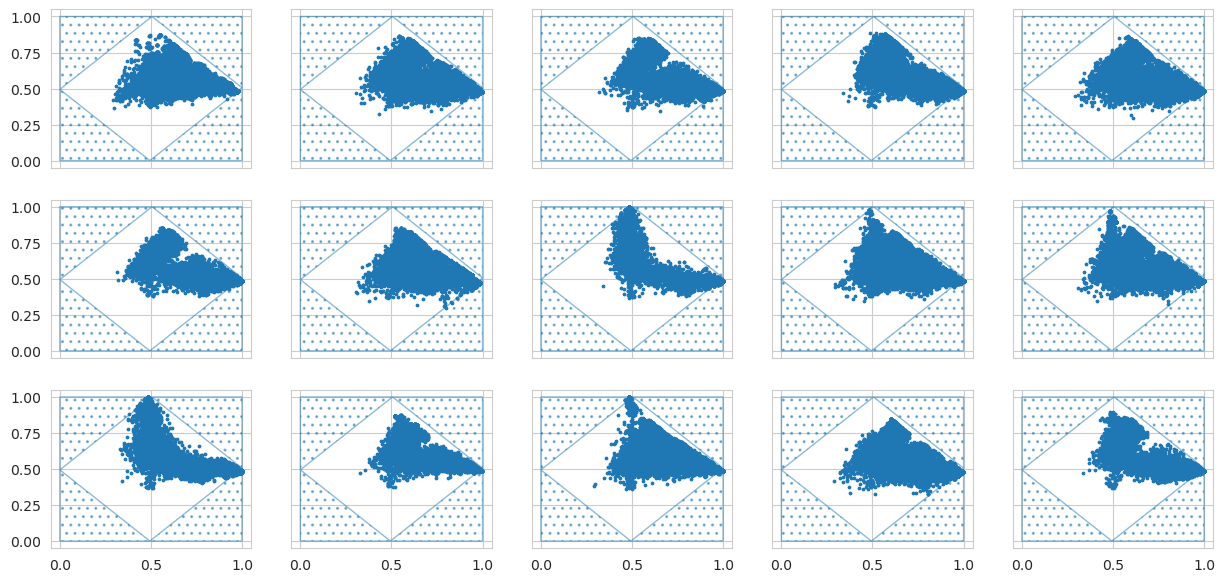

In [20]:
#fits[0].reshape()
#RULE = 54

root="~/scratch/detailed_save/"
num_repeats=15
pop_size = 1000
fits=[np.loadtxt(os.path.expanduser(root+f"variable/stats_300_{RULE}-{RULE}_69904-149796_{i+1}_both_fits.txt")) for i in range(num_repeats)]
fits = np.array(fits)
num_gens = int(fits.shape[1]/2/pop_size)
fits = fits.reshape(num_repeats, num_gens, 2, pop_size)

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7),sharex=True, sharey=True)
axes = axes.flatten()

for r in range(15):
    f1 = fits[r][::100,0,::10]#every 100th generation, every 10th individual
    f2 = fits[r][::100,1,::10]
    axes[r].scatter(f1.flatten(), f2.flatten(),s=3)
    myhatch='..'
    mycolor="C0"
    triangle = Polygon([[1,1], landmarks.iloc[0], landmarks.iloc[1]], closed=True, alpha=0.5,edgecolor=mycolor, facecolor='none',hatch=myhatch)
    axes[r].add_patch(triangle)
    triangle = Polygon([[0,0], landmarks.iloc[5], landmarks.iloc[6]], closed=True, alpha=0.5,edgecolor=mycolor, facecolor='none',hatch=myhatch)
    axes[r].add_patch(triangle)
    triangle = Polygon([[0,1], landmarks.iloc[1], landmarks.iloc[5]], closed=True, alpha=0.5,edgecolor=mycolor, facecolor='none',hatch=myhatch)
    axes[r].add_patch(triangle)
    triangle = Polygon([[1,0], landmarks.iloc[0], landmarks.iloc[6]], closed=True, alpha=0.5,edgecolor=mycolor, facecolor='none',hatch=myhatch)
    axes[r].add_patch(triangle)

    #plt.plot([0, 1], [0, 1], '--', linewidth = 1, color="gray")
plt.title(f"{rule}")
plt.show()

In [5]:
root="~/scratch/detailed_save/"
folders = ["variable","static","static"]
seed_ints = ["69904-149796","69904","149796"]
season_lens=[300,100_000,100_000]
rules = [f"{RULE}-{RULE}", RULE, RULE]
num_repeats = 15
pop_size = 1000

all_fits = []
for g in range(len(season_lens)):
    fits=[np.loadtxt(os.path.expanduser(root+f"{folders[g]}/stats_{season_lens[g]}_{rules[g]}_{seed_ints[g]}_{i+1}_both_fits.txt")) for i in range(num_repeats)]
    fits = np.array(fits)
    num_gens = int(fits.shape[1]/2/pop_size)
    fits = fits.reshape(num_repeats, num_gens, 2, pop_size)
    all_fits.append(fits)
all_fits=np.vstack(all_fits)
all_fits=np.reshape(all_fits, (3, num_repeats, num_gens, 2, pop_size ))
all_fits.shape

(3, 15, 9899, 2, 1000)

In [6]:
def make_restricted_plot(all_targs, num_cells, dev_steps, dot_xs, dot_ys, parent_dots, labelled=True):

    worst= -num_cells*(dev_steps+1) #because theoretical phenotypes can be bad in all rows
    oritargs = np.array([all_targs[0],all_targs[1]])

    where_overlap = np.where(all_targs[0]==all_targs[1])
    where_no_overlap = np.where(all_targs[0]!=all_targs[1])

    bestgen=all_targs[0].copy()
    bestgen[where_no_overlap] = 0.5
    bestgen = np.expand_dims(bestgen, axis=0)

    half= int(len(where_no_overlap[0])/2)

    a = all_targs[0].copy()
    a[tuple(idx[:half] for idx in where_no_overlap)] = 0.5
    a = np.expand_dims(a, axis=0)

    b = all_targs[1].copy()
    b[tuple(idx[:half] for idx in where_no_overlap)] = 0.5
    b = np.expand_dims(b, axis=0)

    inperfa = 1 - all_targs[0].copy()
    inperfa = np.expand_dims(inperfa, axis=0)
    inperfb = 1 - all_targs[1].copy()
    inperfb = np.expand_dims(inperfb, axis=0)

    worstgen=inperfa[0].copy()
    worstgen[where_no_overlap] = 0.5
    worstgen = np.expand_dims(worstgen, axis=0)

    c= all_targs[0].copy()
    c[where_overlap] = 0.5
    c = np.expand_dims(c, axis=0)

    d= all_targs[1].copy()
    d[where_overlap] = 0.5
    d = np.expand_dims(d, axis=0)

    labels = ["A", "B", "Overlap good, rest 0.5", "Overlap good, rest/2 0.5, A", "Overlap good, rest/2 0.5, B", "A inverse","B inverse", "Overlap inverse, rest 0.5"]
    labels.append("A but overlap 0.5")
    labels.append("B but overlap 0.5")

    pop = np.concatenate((oritargs, bestgen,a,b,inperfa,inperfb,worstgen,c,d), axis=0) #0,1, 4,5

    fitnesses1 = -np.abs(pop - all_targs[0]).sum(axis=1).sum(axis=1)
    fitnesses1=1-(fitnesses1/worst) #0-1 scaling
    fitnesses2 = -np.abs(pop - all_targs[1]).sum(axis=1).sum(axis=1)
    fitnesses2=1-(fitnesses2/worst) #0-1 scaling

    pop_df = pd.DataFrame()
    pop_df["x"]=fitnesses1
    pop_df["y"]=fitnesses2
    xs=fitnesses1
    ys=fitnesses2

    if labelled:
        labels = list(zip(fitnesses1,fitnesses2))
        plt.scatter(pop_df["x"], pop_df["y"])
        for i, label in enumerate(labels): 
            plt.text(
                xs[i],
                ys[i],
                label,
                ha="center",
                va="bottom",
                color="black",
            )

    plt.scatter(dot_xs, dot_ys, s=3, c="black", label="children")
    sns.scatterplot(data=parent_dots, x='x', y='y',color='red', s=3, label="parents")

    sns.set_style("whitegrid")

    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)

    myhatch='..'
    mycolor="C0"
    triangle = Polygon([[1,1], pop_df.iloc[0], pop_df.iloc[1]], closed=True, alpha=0.5,edgecolor=mycolor, facecolor='none',hatch=myhatch)
    plt.gca().add_patch(triangle)
    triangle = Polygon([[0,0], pop_df.iloc[5], pop_df.iloc[6]], closed=True, alpha=0.5,edgecolor=mycolor, facecolor='none',hatch=myhatch)
    plt.gca().add_patch(triangle)
    triangle = Polygon([[0,1], pop_df.iloc[1], pop_df.iloc[5]], closed=True, alpha=0.5,edgecolor=mycolor, facecolor='none',hatch=myhatch)
    plt.gca().add_patch(triangle)
    triangle = Polygon([[1,0], pop_df.iloc[0], pop_df.iloc[6]], closed=True, alpha=0.5,edgecolor=mycolor, facecolor='none',hatch=myhatch)
    plt.gca().add_patch(triangle)

    plt.plot([0, 1], [0, 1], '--', linewidth = 1, color="gray")

    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

    return pop_df

In [ ]:
#NOTE: for static envs, fitnesses 1 is always the env they were evaluated on 
# (as opposed to fitnesses 2 being the relevant one when testing environment 1)

repid=1

check_freq=300
pattern = [0] * check_freq + [1] * check_freq
switching_list = np.array(pattern * 100)

a=list(range(9899)) #list(range(500))#
int_gens=np.array(a[check_freq-1::check_freq])
int_gens2 = int_gens - 296
int_gens = sorted(np.concatenate((int_gens, int_gens2)))
curr_list = switching_list[int_gens]
print(int_gens)
print(curr_list)
#int_gens=[1999]

exp_id = 0

for idx, i in enumerate(int_gens):
    print(i)
    fitnesses1=all_fits[exp_id][repid][i][0]
    fitnesses2=all_fits[exp_id][repid][i][1]
        
    pop_df_prev = pd.DataFrame()
    pop_df_prev["x"]=all_fits[exp_id][repid][i-1,0,:]
    pop_df_prev["y"]=all_fits[exp_id][repid][i-1,1,:]

    if curr_list[idx] == 0:
        parent_dots=pop_df_prev.sort_values(by="x",ascending=False).head(100)
    else:
        parent_dots=pop_df_prev.sort_values(by="y",ascending=False).head(100)

    make_restricted_plot(all_targs, num_cells, dev_steps, fitnesses1, fitnesses2, parent_dots, labelled=False)


In [8]:
landmarks

,x,y
0,1.000000,0.505929
1,0.505929,1.000000
2,0.752964,0.752964
3,0.876482,0.629447
4,0.629447,0.876482
5,0.000000,0.494071
6,0.494071,0.000000
7,0.247036,0.247036
8,0.747036,0.252964
9,0.252964,0.747036


In [9]:
def calc_conz_BH(all_fits, landmarks_list):
    #input: whole dataset with all experiments, repetitions, generations, fitnesses, individuals

    #setting up variables
    bestgen=np.array([landmarks_list[0],landmarks_list[1]])
    max_distance_best = helper.calculate_distance(bestgen[0], bestgen[1], landmarks_list[1], landmarks_list[2]) #bottom left corner
    max_distance_line = helper.calculate_distance(bestgen[0], bestgen[1], landmarks_list[3], landmarks_list[4]) #top right corner
    bot=np.array([0,0])
    top=np.array([1,1])
    diagonal_vector = top - bot
    diagonal_vector_expanded = diagonal_vector[np.newaxis, np.newaxis, np.newaxis, :, np.newaxis]
    bot_expanded = bot[np.newaxis, np.newaxis, np.newaxis, :, np.newaxis]

    #calculating generalism for each individual
    distance_best = np.sqrt((bestgen[0] - all_fits[:,:,:,0,:]) ** 2 + (bestgen[1] - all_fits[:,:,:,1,:]) ** 2) #want this to be small
    prop_distance_best = 1 - np.abs(distance_best)/np.abs(max_distance_best)

    distance_line = np.cross(diagonal_vector_expanded, all_fits - bot_expanded, axis = 3) / np.linalg.norm(diagonal_vector_expanded) #want this to be small
    prop_distance_line = 1 - np.abs(distance_line)/np.abs(max_distance_line)


    conz_BH = (prop_distance_best + prop_distance_line) / 2
    conz_BH_mean = np.mean(conz_BH, axis = 3)  #average across individuals  

    return conz_BH, conz_BH_mean

# GENERALISM

In [10]:
landmarks_list = np.array([landmarks.iloc[2][0],landmarks.iloc[2][1], landmarks.iloc[5][0],landmarks.iloc[5][1], landmarks.iloc[0][0],landmarks.iloc[0][1] ])
conz_BH, conz_BH_mean = calc_conz_BH(all_fits, landmarks_list)

/tmp/ipykernel_16483/3167116376.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  landmarks_list = np.array([landmarks.iloc[2][0],landmarks.iloc[2][1], landmarks.iloc[5][0],landmarks.iloc[5][1], landmarks.iloc[0][0],landmarks.iloc[0][1] ])


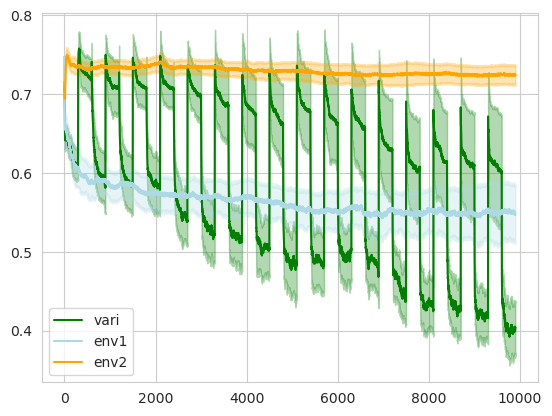

In [11]:
num_reps = 15
z_value = 1.96  # For a 95% confidence interval
labels=["vari","env1","env2"]
colors = ["green", "lightblue", "orange"]

for i in range(3):
    mean1 = conz_BH_mean[i,:,:].mean(axis = 0)
    stderr1 = np.std(conz_BH_mean[i,:,:], axis=0) / np.sqrt(num_reps)
    ci_upper = mean1 + z_value * stderr1
    ci_lower = mean1 - z_value * stderr1
    plt.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3,color=colors[i])
    plt.plot(mean1, "-", label= labels[i], color=colors[i])
plt.legend()

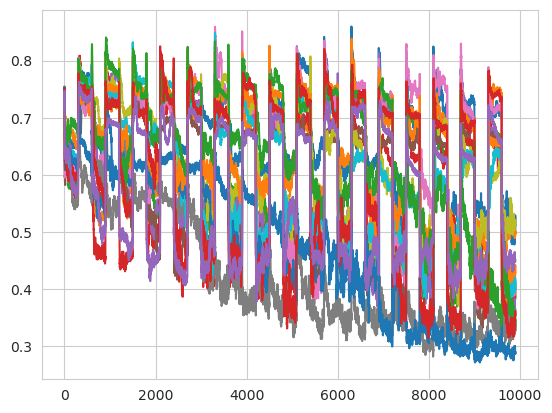

In [12]:
for i in range(num_repeats):
    plt.plot(conz_BH_mean[0,i,:])

In [13]:
import numpy as np
conz_BH_mean.shape

(3, 15, 9899)

0 6301
0.8598238045576295


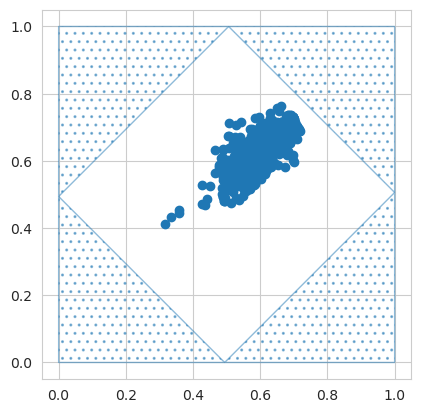

,x,y
0,1.000000,0.505929
1,0.505929,1.000000
2,0.752964,0.752964
3,0.876482,0.629447
4,0.629447,0.876482
5,0.000000,0.494071
6,0.494071,0.000000
7,0.247036,0.247036
8,0.747036,0.252964
9,0.252964,0.747036


In [14]:
exp_id = 0 #variable
highest_gen_rep, highest_gen_gen = np.unravel_index(np.argmax(conz_BH_mean[exp_id,:,:]), conz_BH_mean[0].shape)
print(highest_gen_rep, highest_gen_gen)
print(conz_BH_mean[exp_id,highest_gen_rep, highest_gen_gen])
fitnesses1=all_fits[exp_id, highest_gen_rep, highest_gen_gen][0]
fitnesses2=all_fits[exp_id, highest_gen_rep, highest_gen_gen][1]

helper.make_restricted_plot(all_targs, num_cells, dev_steps, fitnesses1, fitnesses2, labelled=False)

### Now to check for generalist phenotypes

In [15]:
# Parameters
grn_size = 22
num_cells = 22
dev_steps = 22
geneid = 1 #which gene was used to get fitness
root="~/scratch/detailed_save/"
folders = ["variable","static","static"]
seed_ints = ["69904-149796","69904","149796"]
season_lens=[300]# 100_000,100_000]
rules = [f"{RULE}-{RULE}", RULE, RULE]
num_repeats = 15

all_grns = []
for g in range(len(season_lens)):
    grns=[np.loadtxt(os.path.expanduser(root+f"{folders[g]}/stats_{season_lens[g]}_{rules[g]}_{seed_ints[g]}_{i+1}_best_grn.txt")) for i in range(num_repeats)]
    grns = np.array(grns)
    num_grns = int(grns.shape[1]/(grn_size+2)/grn_size)
    grns = grns.reshape(num_repeats,num_grns,grn_size+2,grn_size) #repeats, gens, weights1, weights2
    tmp=np.reshape(grns, (num_repeats,num_grns,(grn_size+2)*grn_size))
    all_grns.append(tmp)
all_grns=np.vstack(all_grns)
#all_grns = np.reshape(all_grns, (num_repeats * num_gens, grn_size+2, grn_size))
print(all_grns.shape)


(15, 9899, 528)


In [16]:
num_gens = 9899
gens=list(range(num_gens))
season_len = 300
n_seasons = int(np.floor(num_gens/season_len))
chunked_gens = np.array([gens[i*300:(i+1)*300] for i in range(n_seasons)])
s1, s2 = chunked_gens[0::2], chunked_gens[1::2]
s1 = np.array([x for xs in s1 for x in xs])
s2 = np.array([x for xs in s2 for x in xs])

In [17]:
#NOTE: CAN EASILY MODIFY TO CHECK FOR EACH BEST GRN HOW GOOD IT WOULD DO GIVEN THE OTHER INPUT
#ONLY FOR VARIABLE EXPERIMENTS
best_fits = np.zeros((num_repeats,len(s1)+len(s2),2))
best_phenos = np.zeros((num_repeats,len(s1)+len(s2),dev_steps+1,num_cells))
#in season 1
for r in range(num_repeats):
    temp_grn = all_grns[r,s1,:]
    temp_grn = np.reshape(temp_grn, (len(s1), grn_size+2, grn_size))
    _, phenos, fitnesses = helper.get_pop_TPF(temp_grn, len(temp_grn), num_cells, grn_size, dev_steps, geneid, RULE, seed_int_target=69904, seed_int_dev = 69904)
    best_fits[r, s1, 0] = fitnesses #compared to the current target
    _, phenos, fitnesses = helper.get_pop_TPF(temp_grn, len(temp_grn), num_cells, grn_size, dev_steps, geneid, RULE, seed_int_target=149796, seed_int_dev = 69904)
    best_fits[r, s1, 1] = fitnesses #compared to the alternative target
    #print(phenos.shape)
    best_phenos[r, s1, :, :] = phenos
#in season 2
for r in range(num_repeats):
    temp_grn = all_grns[r,s2,:]
    temp_grn = np.reshape(temp_grn, (len(s2), grn_size+2, grn_size))
    _, phenos, fitnesses = helper.get_pop_TPF(temp_grn, len(temp_grn), num_cells, grn_size, dev_steps, geneid, RULE, seed_int_target=149796, seed_int_dev = 149796)
    best_fits[r, s2, 0] = fitnesses #compared to the current target
    _, phenos, fitnesses = helper.get_pop_TPF(temp_grn, len(temp_grn), num_cells, grn_size, dev_steps, geneid, RULE, seed_int_target=69904, seed_int_dev = 149796)
    best_fits[r, s2, 1] = fitnesses #compared to the alternative target
    best_phenos[r, s2, :, :] = phenos
best_fits = np.array(best_fits) #num repeats, len(s1)+len(s2), fit1, fit2
best_fits2=best_fits[np.newaxis, :]
best_fits3=np.expand_dims(best_fits2, axis=-1) #same shape as all_fits but just for variable and 1 value per generation
best_fits3.shape

(1, 15, 9600, 2, 1)

In [18]:
best_phenos.shape

(15, 9600, 23, 22)

Text(0, 0.5, 'Divergence from 0.5 expression level')

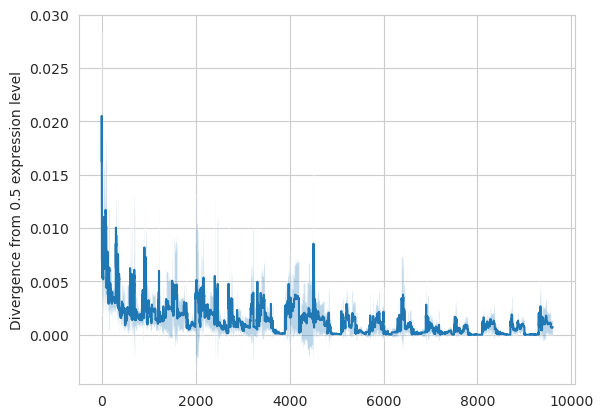

In [19]:
middle_exp = 0.5 - np.abs(best_phenos - 0.5) #exp level 1 -> 0, 0 -> 0, 0.5 -> 0.5
middle_exp = middle_exp.reshape(num_reps, 9600, 23*22)
middle_exp = middle_exp.mean(axis = 2)
middle_exp.shape

mean1 = middle_exp.mean(axis = 0)
stderr1 = np.std(middle_exp, axis=0) / np.sqrt(num_reps)
ci_upper = mean1 + z_value * stderr1
ci_lower = mean1 - z_value * stderr1
plt.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3)
plt.plot(mean1, "-")
plt.ylabel("Divergence from 0.5 expression level")

In [20]:
best_fits3.shape

(1, 15, 9600, 2, 1)

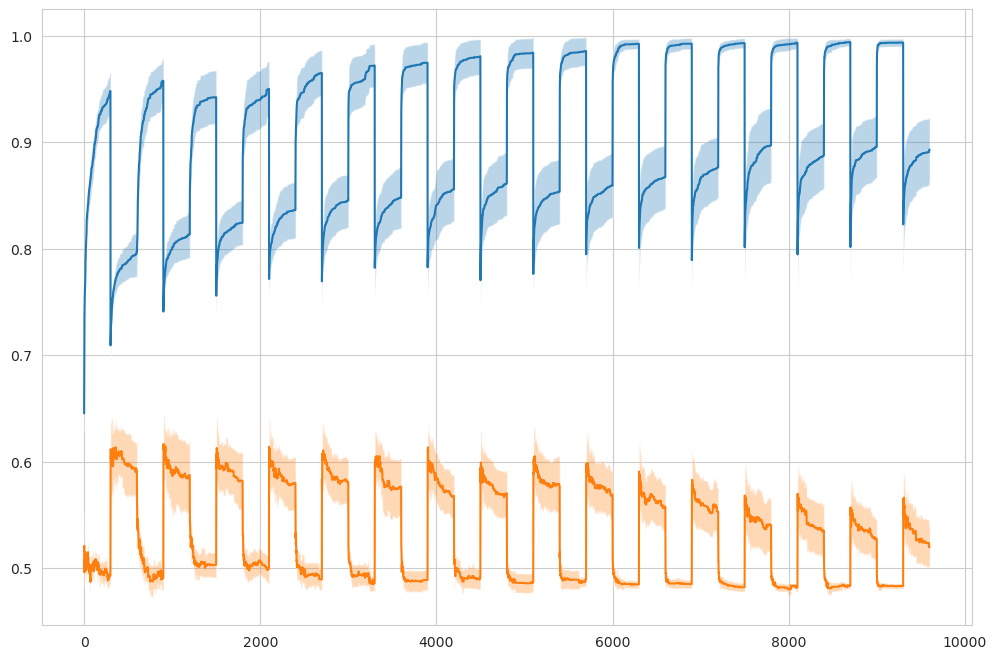

In [21]:
fig = plt.figure(figsize=(12,8))
#plt.plot(best_fits3[0,:,:,0,0].mean(axis = 0))
#plt.plot(best_fits3[0,:,:,1,0].mean(axis = 0))

mean1 = best_fits3[0,:,:,0,0].mean(axis = 0)
stderr1 = np.std(best_fits3[0,:,:,0,0], axis=0) / np.sqrt(num_reps)
ci_upper = mean1 + z_value * stderr1
ci_lower = mean1 - z_value * stderr1
plt.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3)
plt.plot(mean1, "-")

mean1 = best_fits3[0,:,:,1,0].mean(axis = 0)
stderr1 = np.std(best_fits3[0,:,:,1,0], axis=0) / np.sqrt(num_reps)
ci_upper = mean1 + z_value * stderr1
ci_lower = mean1 - z_value * stderr1
plt.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3)
plt.plot(mean1, "-")

In [22]:
landmarks_list = np.array([landmarks.iloc[2][0],landmarks.iloc[2][1], landmarks.iloc[5][0],landmarks.iloc[5][1], landmarks.iloc[0][0],landmarks.iloc[0][1] ])


/tmp/ipykernel_16483/867190813.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  landmarks_list = np.array([landmarks.iloc[2][0],landmarks.iloc[2][1], landmarks.iloc[5][0],landmarks.iloc[5][1], landmarks.iloc[0][0],landmarks.iloc[0][1] ])


In [23]:
best_conz_BH, _ = calc_conz_BH(best_fits3, landmarks_list)
print(best_conz_BH.shape)

n=1
best_gen_gens = (-best_conz_BH).argsort(axis = 2)[:,:,:n,:] #np.argmax(best_conz_BH) #FOR EACH REP, GET N HIGHEST GENERALIST among the generations
print(best_gen_gens.shape)
for r in range(num_reps):
    print(best_gen_gens[0,r,:,0])

(1, 15, 9600, 1)
(1, 15, 1, 1)
[302]
[9300]
[6301]
[313]
[6300]
[0]
[3300]
[0]
[311]
[903]
[301]
[302]
[321]
[308]
[320]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


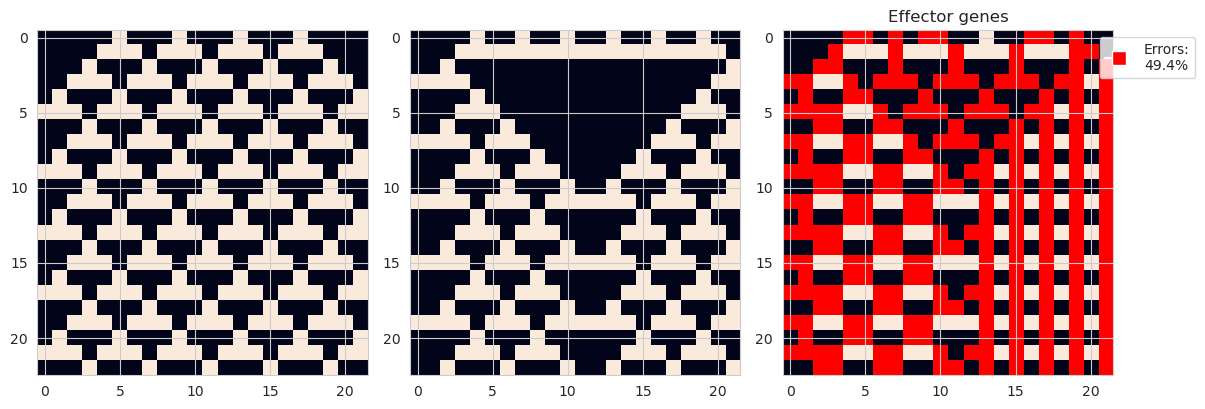

In [24]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))
#Plot best phenotype
axs[0].imshow(all_targs[0])
#Plot target
axs[1].imshow(all_targs[1])
#Plot difference
helper.show_effectors(all_targs[0], all_targs[1], M=0, ax=axs[2])

plt.tight_layout()
plt.show()

In [25]:
best_conz_BH.shape

(1, 15, 9600, 1)

[302]
0.9309793500757744


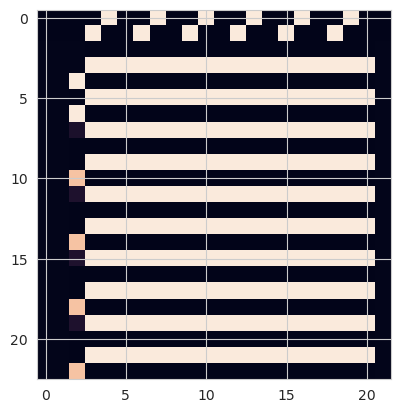

[9300]
0.9066097936524224


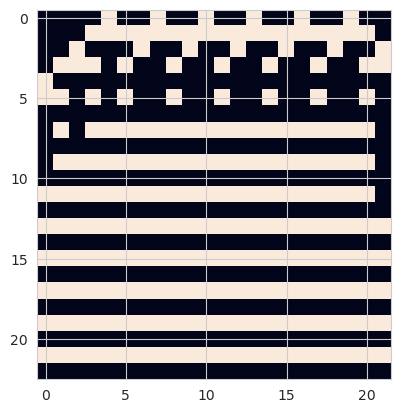

[6301]
0.8478062155970326


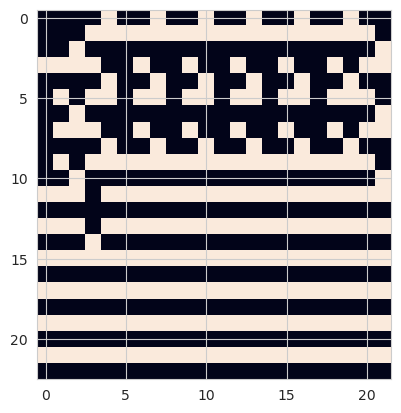

[313]
0.8636984035668447


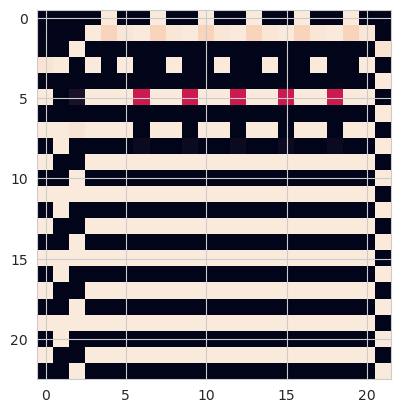

[6300]
0.8765200065086198


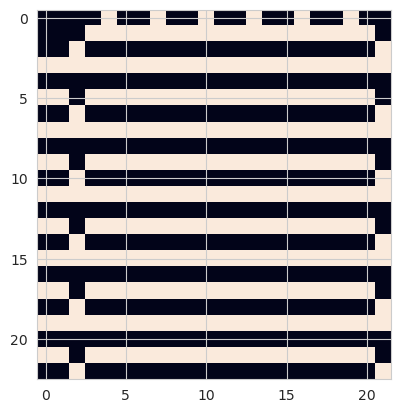

[0]
0.8379188835097966


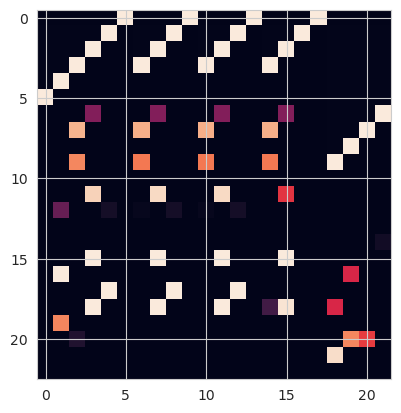

[3300]
0.8847726596309746


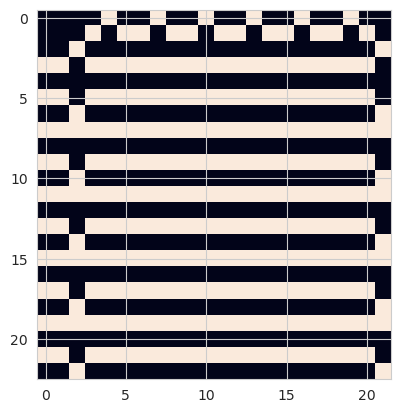

[0]
0.6955066154117574


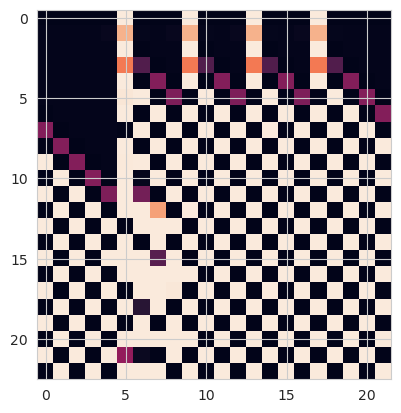

[311]
0.9313001396456265


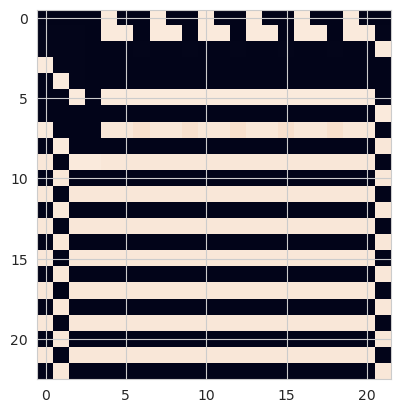

[903]
0.9115819233509603


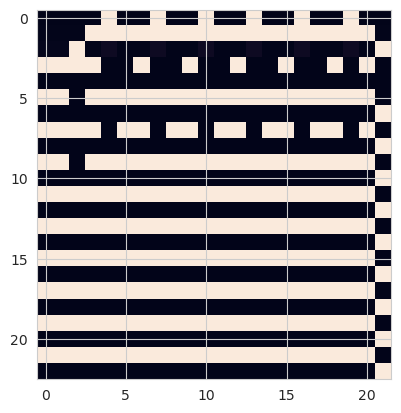

[301]
0.7890135545230886


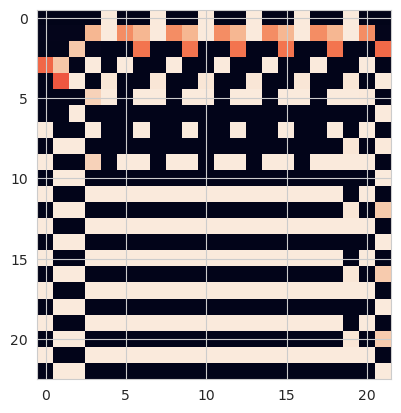

[302]
0.9055275472236433


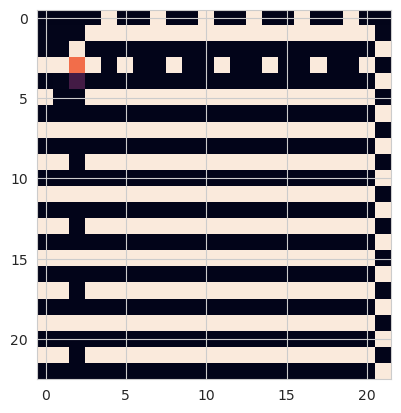

[321]
0.8970229825815079


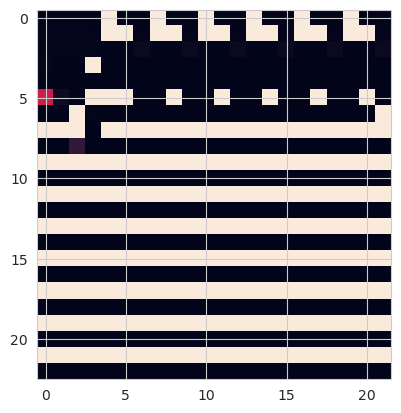

[308]
0.8570343616839957


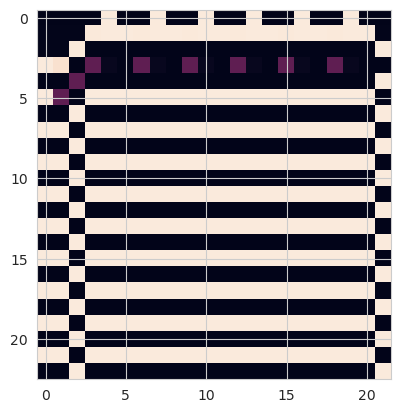

[320]
0.8409607531127259


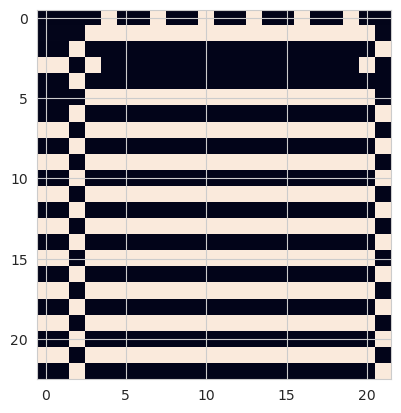

In [26]:
for r in range(num_reps):
    print(best_gen_gens[0,r,:,0])
    for g in best_gen_gens[0,r,:,0]:
        print(best_conz_BH[0,r,g,0])
        plt.imshow(best_phenos[r, g,:,:])
        plt.show()

In [27]:
all_grns.shape

(15, 9899, 528)

In [28]:
#NOTE: CAN EASILY MODIFY TO CHECK FOR EACH BEST GRN HOW GOOD IT WOULD DO GIVEN THE OTHER INPUT --> this is it
#ONLY FOR VARIABLE EXPERIMENTS
best_fits = np.zeros((num_repeats,len(s1)+len(s2),2))
best_phenos = np.zeros((num_repeats,len(s1)+len(s2),dev_steps+1,num_cells))
#in season 1
for r in range(num_repeats):
    temp_grn = all_grns[r,s1,:]
    temp_grn = np.reshape(temp_grn, (len(s1), grn_size+2, grn_size))
    _, phenos, fitnesses = helper.get_pop_TPF(temp_grn, len(temp_grn), num_cells, grn_size, dev_steps, geneid, RULE, seed_int_target=69904, seed_int_dev = 69904)
    best_fits[r, s1, 0] = fitnesses #compared to the current target
    _, phenos, fitnesses = helper.get_pop_TPF(temp_grn, len(temp_grn), num_cells, grn_size, dev_steps, geneid, RULE, seed_int_target=149796, seed_int_dev = 149796)
    best_fits[r, s1, 1] = fitnesses #compared to the alternative target
    #print(phenos.shape)
    best_phenos[r, s1, :, :] = phenos
#in season 2
for r in range(num_repeats):
    temp_grn = all_grns[r,s2,:]
    temp_grn = np.reshape(temp_grn, (len(s2), grn_size+2, grn_size))
    _, phenos, fitnesses = helper.get_pop_TPF(temp_grn, len(temp_grn), num_cells, grn_size, dev_steps, geneid, RULE, seed_int_target=149796, seed_int_dev = 149796)
    best_fits[r, s2, 0] = fitnesses #compared to the current target
    _, phenos, fitnesses = helper.get_pop_TPF(temp_grn, len(temp_grn), num_cells, grn_size, dev_steps, geneid, RULE, seed_int_target=69904, seed_int_dev = 69904)
    best_fits[r, s2, 1] = fitnesses #compared to the alternative target
    best_phenos[r, s2, :, :] = phenos
best_fits = np.array(best_fits) #num repeats, len(s1)+len(s2), fit1, fit2
best_fits2=best_fits[np.newaxis, :]
best_fits3=np.expand_dims(best_fits2, axis=-1) #same shape as all_fits but just for variable and 1 value per generation
best_fits3.shape

(1, 15, 9600, 2, 1)

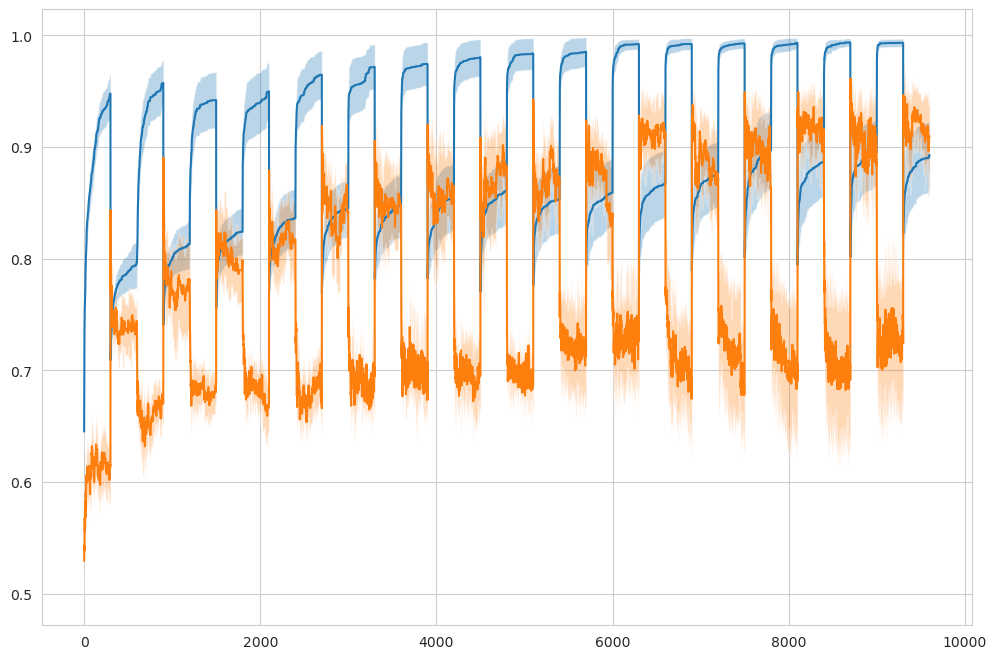

In [29]:
#Darker = newer, best GRN fitness in each generation, given that judging alternative environment happens with alternative input!
#cmaps=["Reds", "Blues", "Greens"]

#for r in range(num_repeats):
#    color_map = plt.get_cmap(cmaps[r])
#    for g in range(best_fits3.shape[2]):
#        color = color_map(g / (num_gens - 1)+0.3)
#        plt.scatter(best_fits3[0,r,g,0,0],best_fits3[0,r,g,1,0],color=color)

fig = plt.figure(figsize=(12,8))
#plt.plot(best_fits3[0,:,:,0,0].mean(axis = 0))
#plt.plot(best_fits3[0,:,:,1,0].mean(axis = 0))

mean1 = best_fits3[0,:,:,0,0].mean(axis = 0)
stderr1 = np.std(best_fits3[0,:,:,0,0], axis=0) / np.sqrt(num_reps)
ci_upper = mean1 + z_value * stderr1
ci_lower = mean1 - z_value * stderr1
plt.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3)
plt.plot(mean1, "-")

mean1 = best_fits3[0,:,:,1,0].mean(axis = 0)
stderr1 = np.std(best_fits3[0,:,:,1,0], axis=0) / np.sqrt(num_reps)
ci_upper = mean1 + z_value * stderr1
ci_lower = mean1 - z_value * stderr1
plt.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3)
plt.plot(mean1, "-")

# Diversifying

In [30]:
root="~/scratch/detailed_save/"
folders = ["variable","static","static"]
seed_ints = ["69904-149796","69904","149796"]
season_lens=[300,100_000,100_000]
rules = [f"{RULE}-{RULE}", RULE, RULE]
num_repeats = 15
pop_size = 1000


all_edges = []
for g in range(len(season_lens)):
    edges=[np.loadtxt(os.path.expanduser(root+f"{folders[g]}/stats_{season_lens[g]}_{rules[g]}_{seed_ints[g]}_{i+1}_edges.txt")) for i in range(num_repeats)]
    edges = np.array(edges).astype(int) 
    num_generations=int(edges.shape[1]/4/pop_size)
    print(edges.shape, num_generations)
    edges = edges.reshape(num_repeats, num_generations*pop_size, 2, 2)
    all_edges.append(edges)
all_edges=np.vstack(all_edges)
all_edges=np.reshape(all_edges, (3, num_repeats, num_generations*pop_size, 2, 2 ))
all_edges.shape

(15, 39596000) 9899
(15, 39596000) 9899
(15, 39596000) 9899


(3, 15, 9899000, 2, 2)

In [31]:
from tqdm import trange

kid_fits = np.zeros((3,num_repeats,num_generations-1,2, 100,10))
for e in range(3):
    for rep in range(num_repeats):
        for g in trange(num_generations-1): #last gen has kids but no fitnesses computed
            start = g*pop_size
            stop = g*pop_size + pop_size
            a = all_edges[e,rep,start:stop, :, :] #first generation, gen 0
            unique_first_positions, inverse_indices = np.unique(a[:, 0], axis=0, return_inverse=True)
            #print(unique_first_positions.shape) #100, parents
            #print(inverse_indices.shape) #1000, kids, including surviving parents
            b = np.array([a[:, 1][inverse_indices == i] for i in range(len(unique_first_positions))]) #for each parent, 10 kids, 2d id
            b = b[:,:,1] #only second id is interesting
            b_flattened = b.reshape(pop_size)
            b_fits = all_fits[e,rep,g+1,:,:][:,b_flattened] #have to be looking 1 gen down
            b_fits = b_fits.reshape(2, 100, 10) #the 2 fitness values, num parents, num kids
            #print(b_fits[1,3,5]) #fitness2 of the sixth kid of the fourth parent
            #print(all_fits[0,0,1,1,777]) #fitness2 of the 777th individual in the population in the second generation
            kid_fits[e,rep,g,:,:,:] = b_fits

100%|██████████| 9898/9898 [00:09<00:00, 1016.37it/s]


In [32]:
kid_fits.shape #experiment, rep, generation, 2 fits, 100 parents, 10 kids

(3, 15, 9898, 2, 100, 10)

In [ ]:
div_BH, div_BH_mean = helper.calc_div_BH(kid_fits, landmarks)
div_BH.shape

In [275]:
div_BH_mean.shape

(3, 15, 9898)

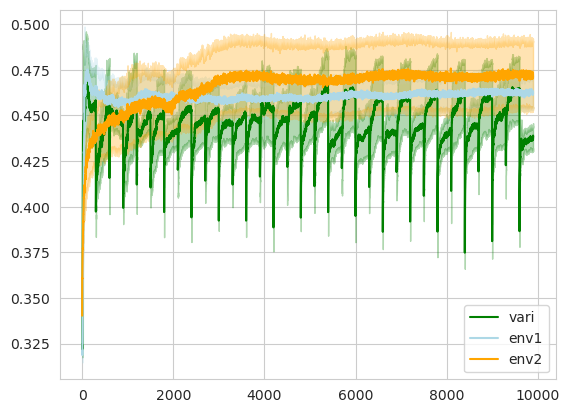

In [276]:
num_reps = 15
z_value = 1.96  # For a 95% confidence interval
labels=["vari","env1","env2"]
colors = ["green", "lightblue", "orange"]

for i in range(3):
    mean1 = div_BH_mean[i,:,:].mean(axis = 0)
    stderr1 = np.std(div_BH_mean[i,:,:], axis=0) / np.sqrt(num_reps)
    ci_upper = mean1 + z_value * stderr1
    ci_lower = mean1 - z_value * stderr1
    plt.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3,color=colors[i])
    plt.plot(mean1, "-", label= labels[i], color=colors[i])
plt.legend()

In [277]:
flat_index = np.argmax(div_BH)
# Convert the flat index to coordinates in the original shape
coordinates = np.unravel_index(flat_index, div_BH.shape)
coordinates #experiment, rep, gen, parent

(0, 8, 5936, 52)

In [278]:
all_fits.shape


(3, 15, 9899, 2, 1000)

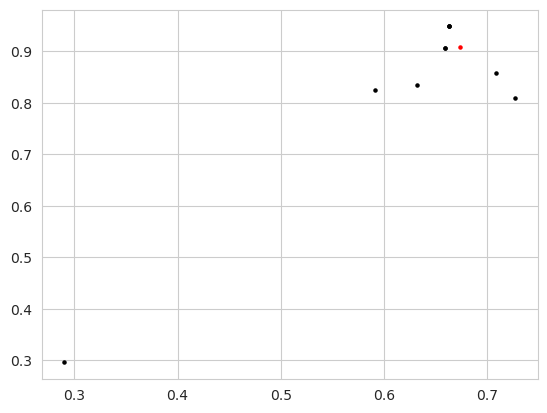

In [279]:
fitnesses1 = kid_fits[coordinates[0],coordinates[1],coordinates[2],0,coordinates[3],:]
fitnesses2 = kid_fits[coordinates[0],coordinates[1],coordinates[2],1,coordinates[3],:]
plt.scatter(fitnesses1, fitnesses2, s = 5, c="black")
pf1 = all_fits[coordinates[0],coordinates[1],coordinates[2],0,coordinates[3]]
pf2 = all_fits[coordinates[0],coordinates[1],coordinates[2],1,coordinates[3]]
plt.scatter(pf1, pf2, s = 5, c= "red")
#helper.make_restricted_plot(all_targs, num_cells, dev_steps, fitnesses1, fitnesses2, labelled=False)

(0, 0, 7499, 66)


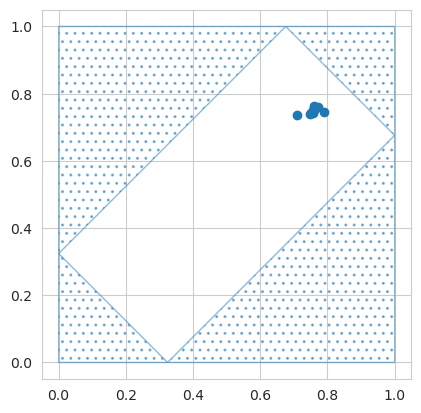

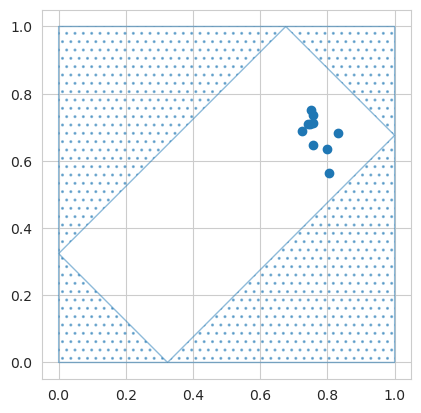

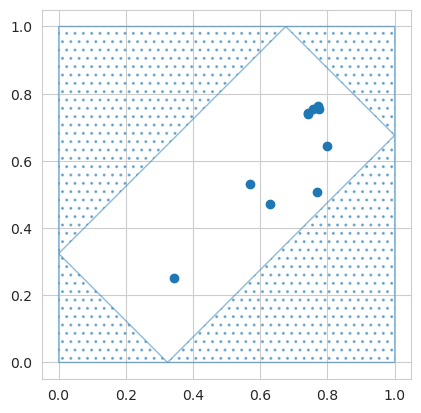

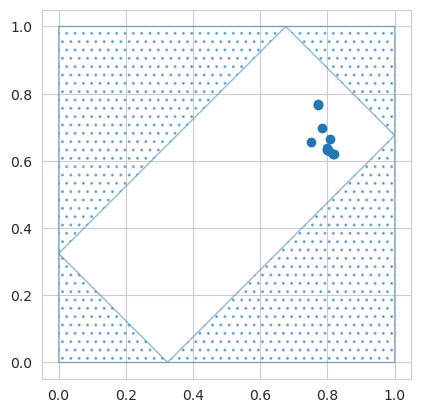

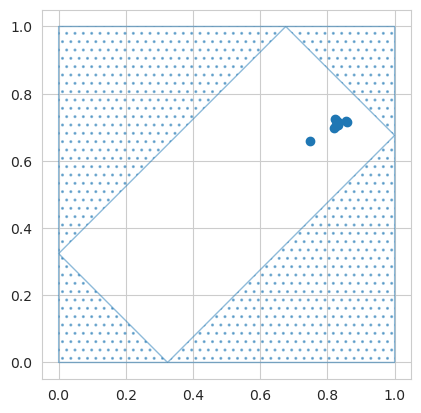

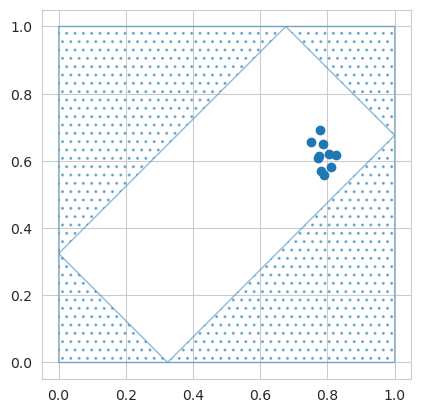

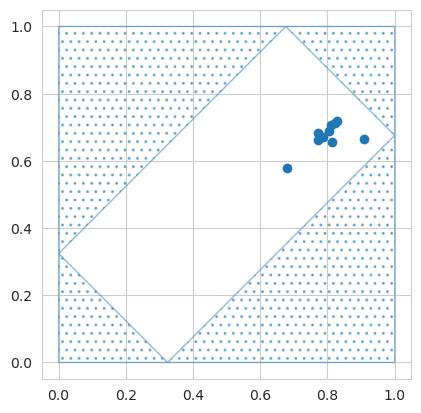

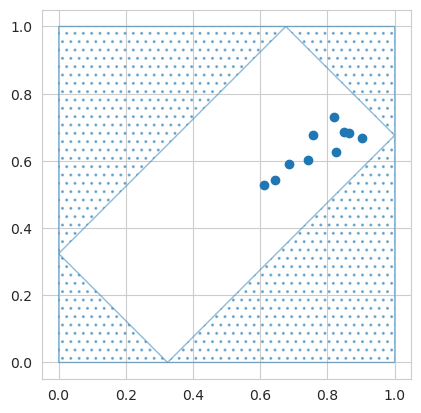

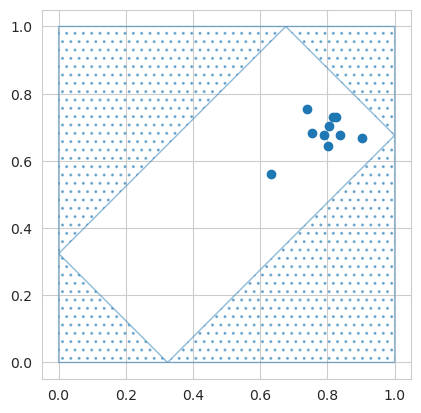

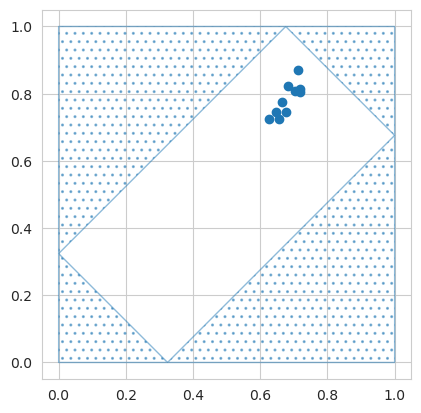

In [280]:
flat_index = np.argmin(div_BH)
# Convert the flat index to coordinates in the original shape
coordinates = np.unravel_index(flat_index, div_BH.shape)
print(coordinates) #experiment, rep, gen, parent

for i in range(10):
    rand_coordinate = [np.random.choice([0,1,2]),np.random.choice([0,1]),np.random.choice(list(range(1800))),np.random.choice(list(range(100)))]
    coordinates = rand_coordinate
    fitnesses1 = kid_fits[coordinates[0],coordinates[1],coordinates[2],0,coordinates[3],:]
    fitnesses2 = kid_fits[coordinates[0],coordinates[1],coordinates[2],1,coordinates[3],:]
    helper.make_restricted_plot(all_targs, num_cells, dev_steps, fitnesses1, fitnesses2, labelled=False)